In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from io import StringIO
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

time = 10
offset = 100

TASK 1- QUE 1

Preprocessing

In [147]:
d_laying = pd.read_csv("E:\kuchhbhi\Combined\Train\LAYING\Subject_1.csv")[offset:offset+time*50]
d_sitting = pd.read_csv("E:\kuchhbhi\Combined\Train\SITTING\Subject_1.csv")[offset:offset+time*50]
d_standing = pd.read_csv("E:\kuchhbhi\Combined\Train\STANDING\Subject_1.csv")[offset:offset+time*50]
d_walking = pd.read_csv("E:\kuchhbhi\Combined\Train\WALKING\Subject_1.csv")[offset:offset+time*50]
d_walking_d = pd.read_csv("E:\kuchhbhi\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv")[offset:offset+time*50]
d_walking_u = pd.read_csv("E:\kuchhbhi\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv")[offset:offset+time*50]

for i in [d_laying, d_sitting, d_standing, d_walking, d_walking_d, d_walking_u]:
    i["acc"]= np.sqrt(i["accx"]**2 +i["accy"]**2 + i["accz"]**2)


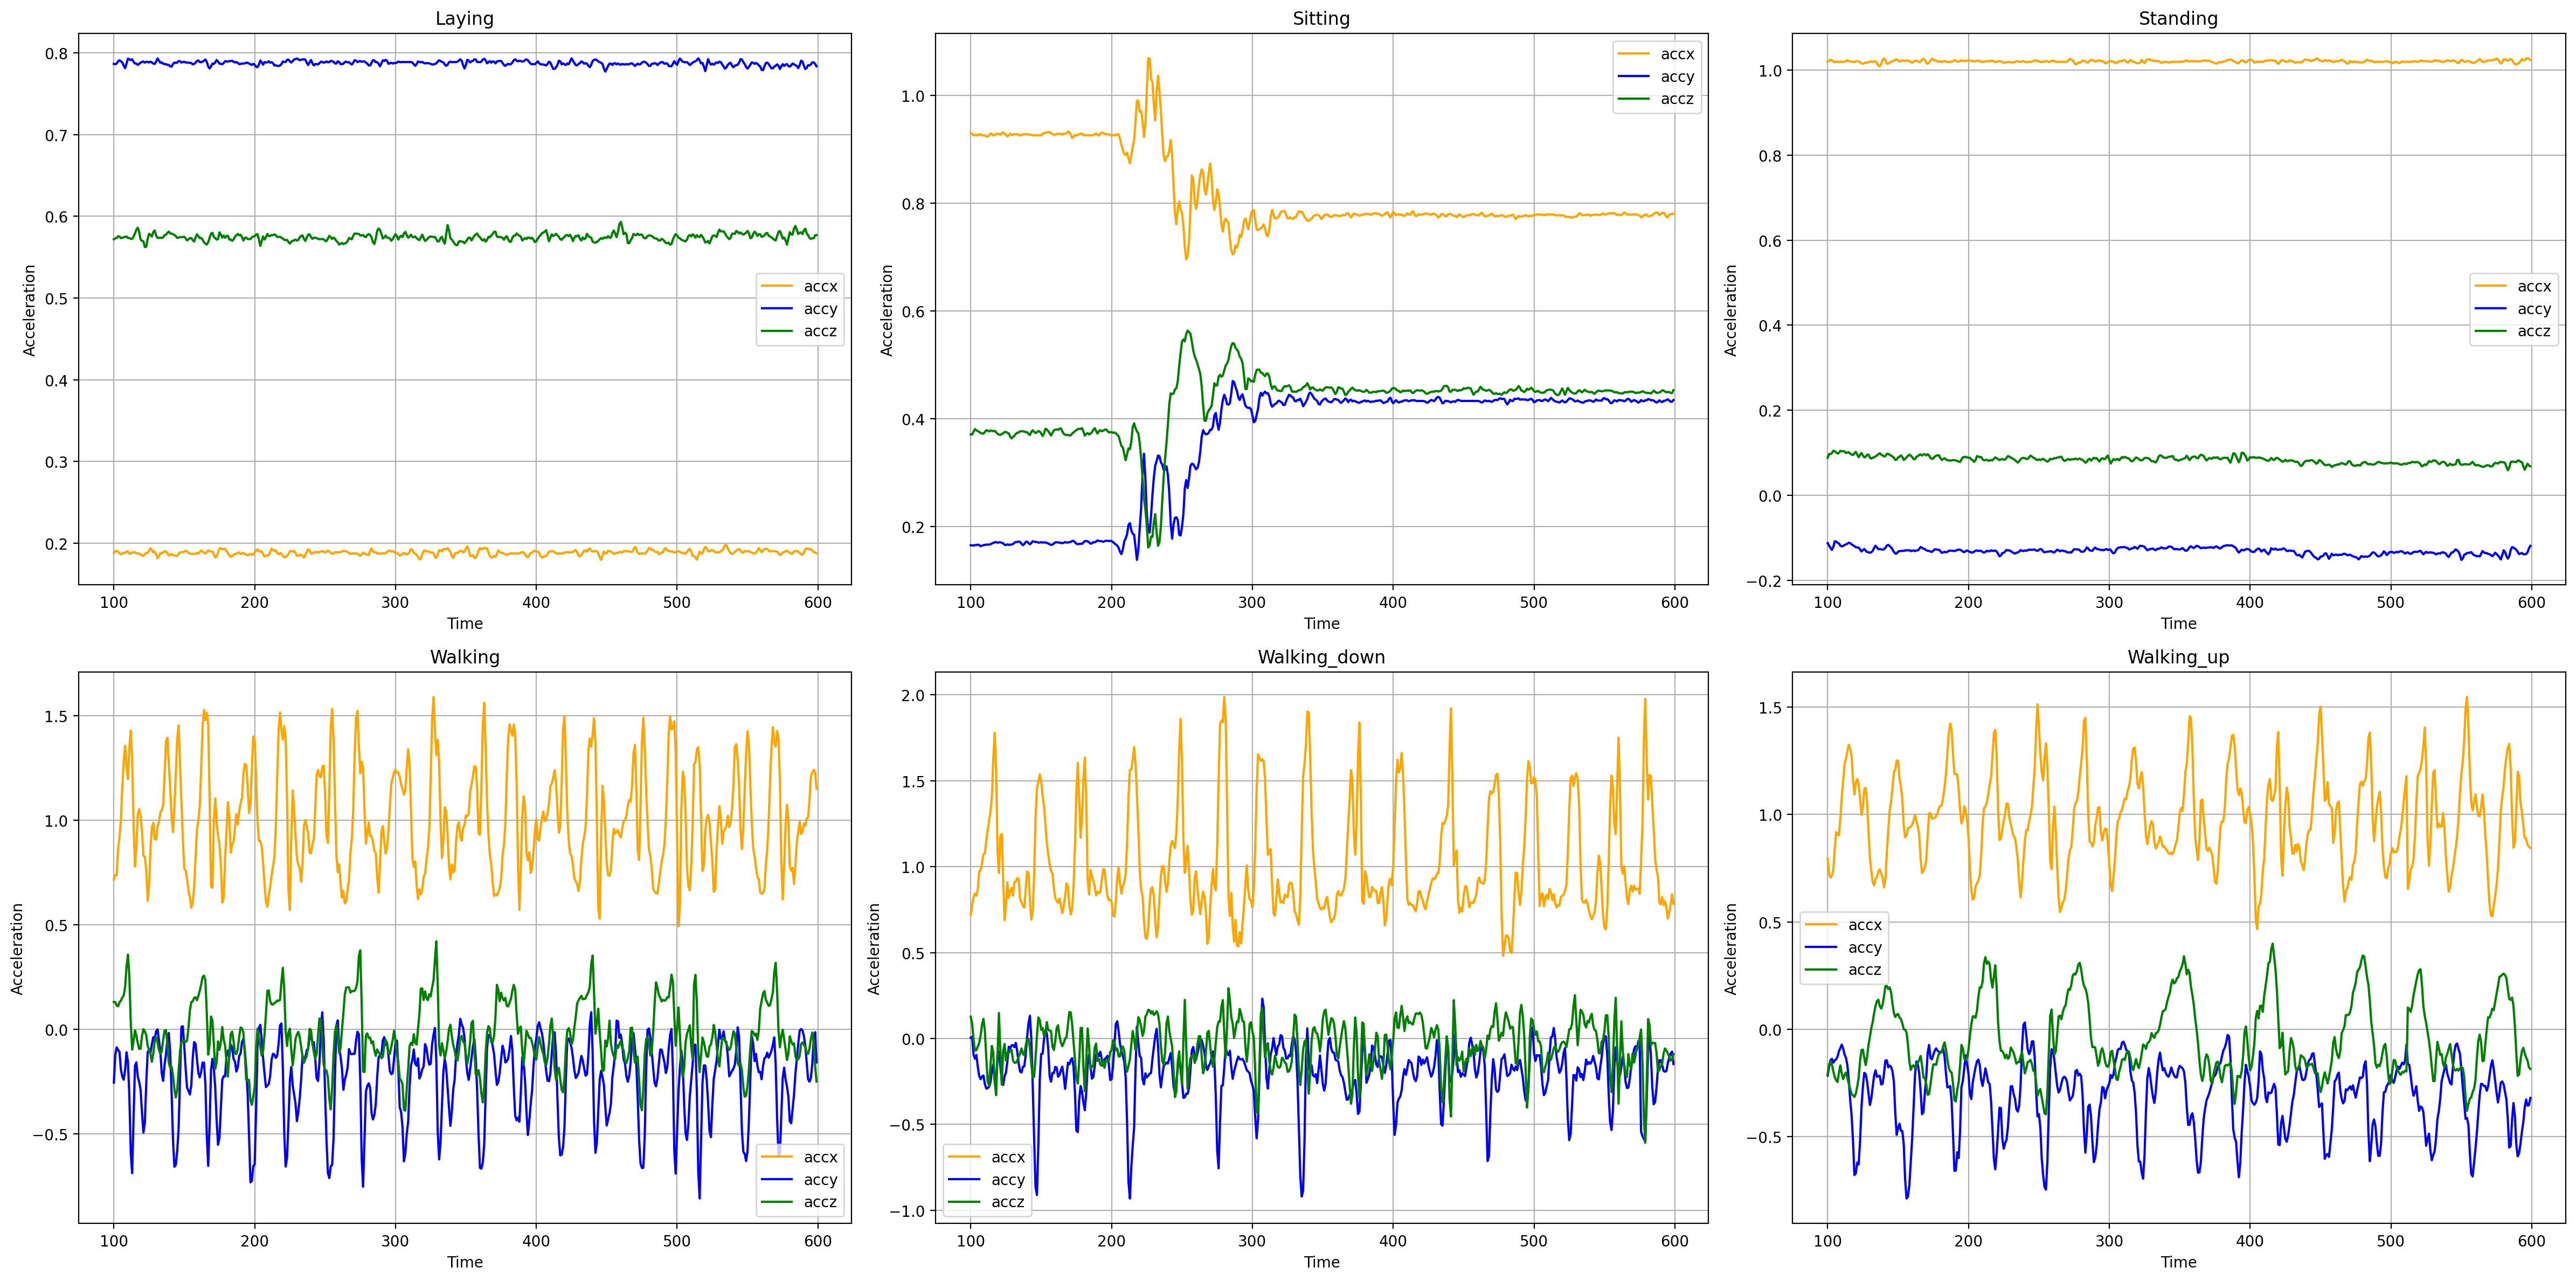

In [148]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

colors = {'accx': 'orange', 'accy': 'blue', 'accz': 'green'}

dfs = [d_laying, d_sitting, d_standing, d_walking, d_walking_d, d_walking_u]
titles = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_down', 'Walking_up']

axes = axes.flatten()

for i, (df, title) in enumerate(zip(dfs, titles)):
    axes[i].plot(df['accx'], label='accx', color=colors['accx'])
    axes[i].plot(df['accy'], label='accy', color=colors['accy'])
    axes[i].plot(df['accz'], label='accz', color=colors['accz'])
    axes[i].set_title(title)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Acceleration')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


The model will not be able to clearly classify on the basis of this dataset. This is because this data is not well processed and there are alot of similarities in the acceleration and its pattern.
The activities like laying, standing and sitting can indeed be differentiated from the motions of walking , walking_downstairs and walking_upstairs.
Further classification under those is difficult.
Here we could see a bit of deviation in the graph of sitting, probably that is beacuse of the standing and then moving to the sitting position.

QUE -2

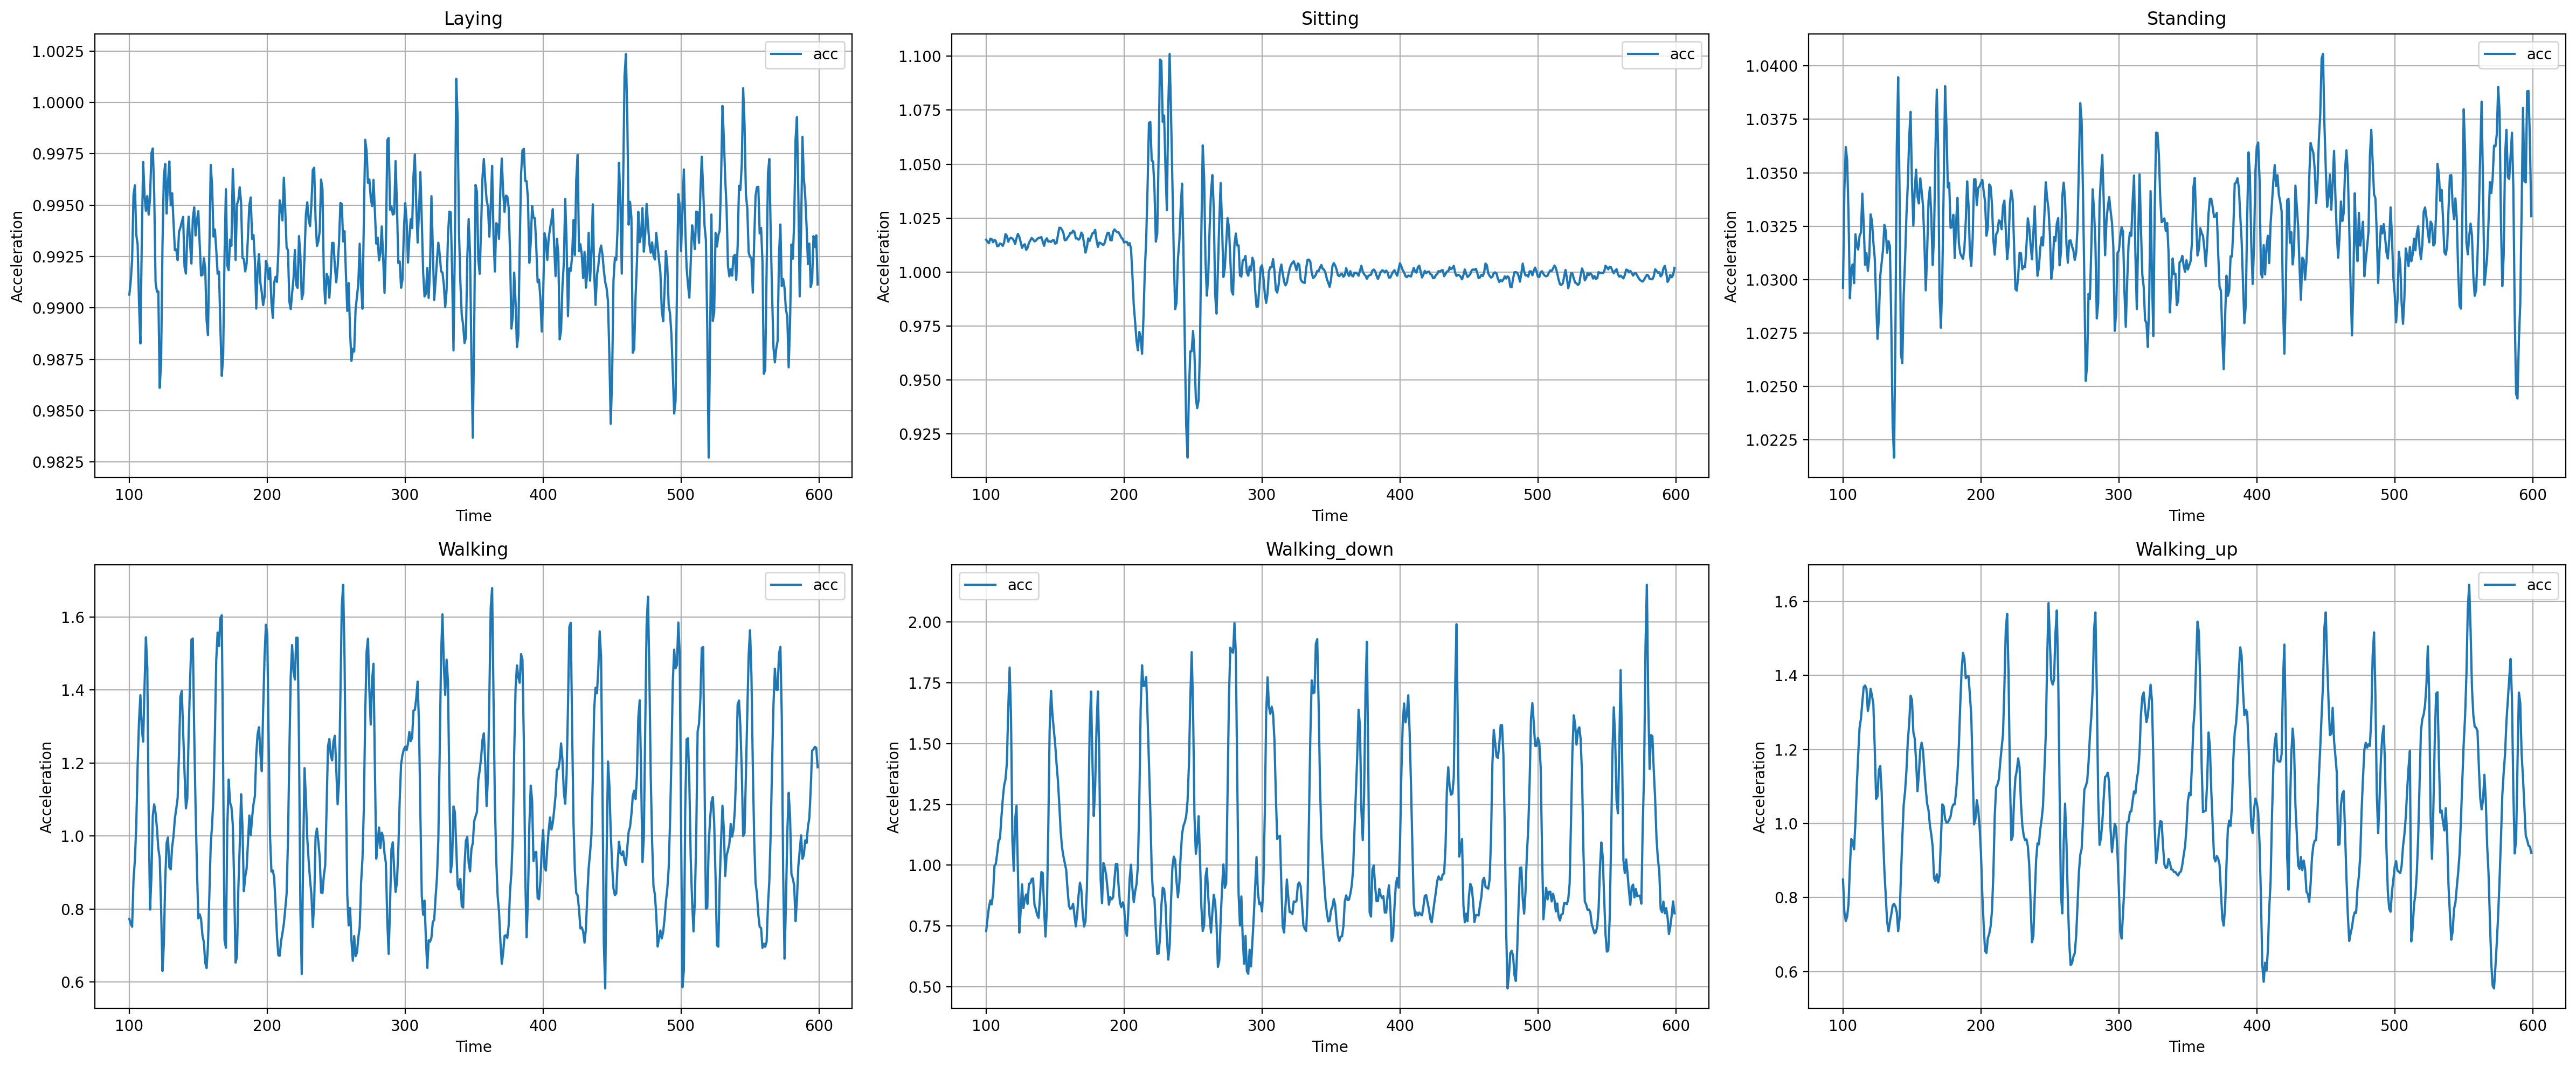

In [149]:
fig, axes = plt.subplots(2, 3, figsize=(24, 10))
dfs = [d_laying, d_sitting, d_standing, d_walking, d_walking_d, d_walking_u]
titles = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_down', 'Walking_up']
for i, (df, title) in enumerate(zip(dfs, titles)):
    row = i // 3
    col = i % 3

    axes[row,col].plot(df['acc'], label='acc')
    axes[row,col].set_title(title)
    axes[row,col].set_xlabel('Time')
    axes[row,col].set_ylabel('Acceleration')
    axes[row,col].legend()
    axes[row,col].grid(True)
plt.tight_layout()

Most probably no. We don't require much accuracy in finding out the static and dynamic activities because we see that the total acceleration of the static acitivities is rarely or never above 1.5 units. But the for the dynamic its most of the time. Since its a small datasize its a bit difficult to generarlize. Also we could see the fluctuations in the total acceleration of the dyanmic activities is very high and its range is high.
We could anyways use to distinguish static and dynamic but its hard to say about the accuracy



QUES -3.1

In [150]:

arr = np.load("E:\kuchhbhi\X_train.npy")
total = np.sqrt(np.sum(arr**2,axis=2))
print(arr.shape)
print(arr)


df = pd.DataFrame(total)
activities = ['laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs']
num_samples_per_activity = arr.shape[0] // len(activities)  
labels = np.repeat(activities, num_samples_per_activity)
df_labels = pd.Series(labels)
df['Activity'] = df_labels.values

print(df.shape)



(126, 500, 3)
[[[ 1.19648    -0.1606898  -0.740178  ]
  [ 1.22203    -0.2672951  -0.7717485 ]
  [ 1.22311    -0.4338634  -0.7678422 ]
  ...
  [ 0.4974957  -0.2795907  -0.2029592 ]
  [ 0.5064167  -0.286091   -0.2564634 ]
  [ 0.5609918  -0.302237   -0.2553743 ]]

 [[ 0.253887    0.6446213   0.7305601 ]
  [ 0.2547409   0.6470096   0.7330282 ]
  [ 0.256914    0.6468081   0.7354798 ]
  ...
  [ 0.2489302   0.642803    0.7323693 ]
  [ 0.2503708   0.6447095   0.7369245 ]
  [ 0.2513104   0.6440663   0.735841  ]]

 [[ 0.9736077  -0.1844755  -0.2821974 ]
  [ 0.9760866  -0.1867793  -0.2848794 ]
  [ 0.977865   -0.191836   -0.2891687 ]
  ...
  [ 0.9779202  -0.1834941  -0.2829651 ]
  [ 0.9796224  -0.1832831  -0.279844  ]
  [ 0.9775468  -0.1833646  -0.2764387 ]]

 ...

 [[ 0.1943966   0.5317094   0.834933  ]
  [ 0.1938159   0.5319046   0.8337903 ]
  [ 0.1907567   0.5332984   0.8291312 ]
  ...
  [ 0.188955    0.5606699   0.8099954 ]
  [ 0.186853    0.5615242   0.8113412 ]
  [ 0.1877281   0.5637395   0.

In [151]:
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,Activity
0,1.416068,1.469830,1.507918,1.452425,1.216848,1.090201,1.111856,1.071870,1.106612,1.185212,...,1.058595,1.025795,0.947143,0.796857,0.680303,0.626330,0.605694,0.635672,0.686495,laying
1,1.006833,1.010369,1.012569,1.013501,1.011932,1.011234,1.013346,1.013446,1.013776,1.013496,...,1.014921,1.007778,0.999139,1.003189,1.006525,1.001850,1.005747,1.010640,1.009673,laying
2,1.030329,1.033822,1.037612,1.040009,1.040998,1.043643,1.043321,1.038132,1.035484,1.036237,...,1.034021,1.035409,1.035741,1.034289,1.032960,1.033137,1.034441,1.035164,1.032298,laying
3,0.705104,0.747597,0.793106,0.873028,0.868487,0.860511,0.959374,1.044385,1.061314,1.014860,...,1.318746,1.544286,1.634954,1.534755,1.412596,1.289917,1.179780,1.195202,1.141141,laying
4,0.725529,0.782913,0.790660,0.785682,0.809201,0.806973,0.876023,0.931568,0.944824,1.001830,...,0.824100,0.807754,0.801373,0.798007,0.759348,0.714624,0.750961,0.783315,0.791976,laying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.291127,1.297432,1.183386,1.182686,1.201565,1.195548,1.192607,1.127848,1.125313,1.278853,...,0.790597,0.847483,0.906741,0.906648,0.857204,0.881844,0.903662,0.932606,1.017917,walking_upstairs
122,1.014923,1.013980,1.013337,1.015442,1.015216,1.013798,1.014901,1.014274,1.011932,1.012130,...,1.001725,1.002828,0.999931,0.995384,0.996450,0.998702,0.997537,0.998601,1.001916,walking_upstairs
123,1.008771,1.007816,1.004118,1.001791,1.003611,1.009768,1.011939,1.009258,1.009234,1.011144,...,1.008691,1.005362,1.003760,1.001959,0.998313,1.001120,1.003069,1.004240,1.009679,walking_upstairs
124,0.858528,0.861756,0.782441,0.781938,0.786681,0.759529,0.814851,0.845687,0.872875,0.904703,...,0.857601,0.842041,0.849614,0.848575,0.779264,0.751789,0.727659,0.727208,0.716132,walking_upstairs


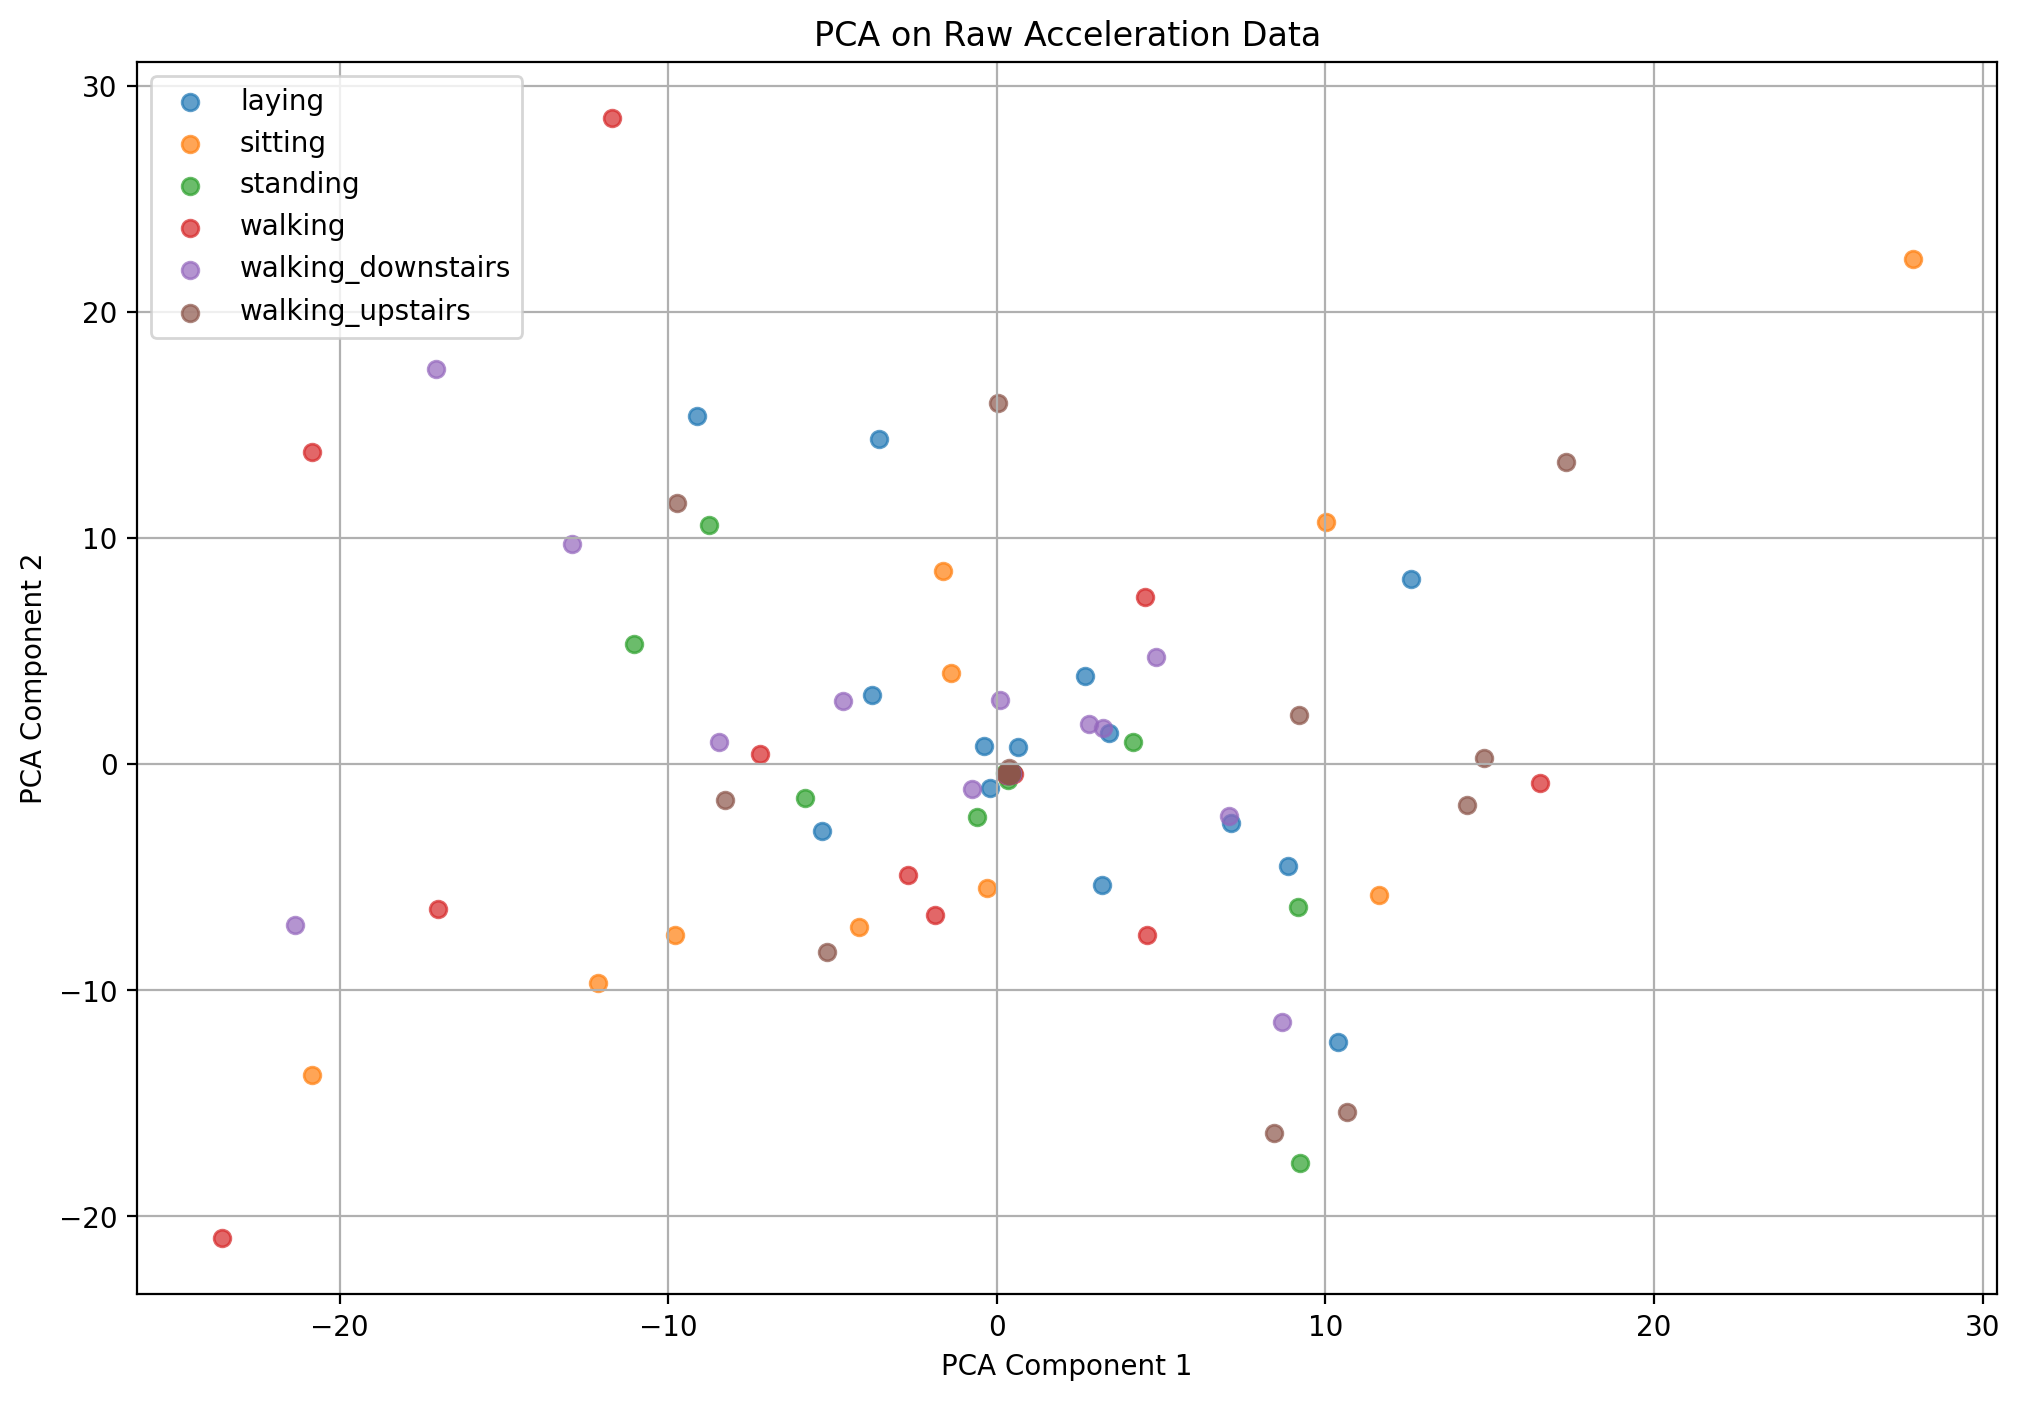

In [152]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from io import StringIO


features = df.iloc[:, :-1] 
labels = df.iloc[:, -1]  


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

PCA1 = pca_result[:, 0]
PCA2 = pca_result[:, 1]

plt.figure(figsize=(12, 8))

unique_labels = labels.unique()
colors = plt.get_cmap('tab10').colors
color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

for label in unique_labels:
    mask = labels == label
    plt.scatter(PCA1[mask], PCA2[mask], color=color_map[label], label=label, alpha=0.7)

# Add labels and legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on Raw Acceleration Data')
plt.legend()
plt.grid(True)
plt.show()


In [153]:
df_data = df.drop(columns="Activity")

QUE -3.2

In [154]:
import tsfel

def extract_row_features(row, cfg):
    return tsfel.time_series_features_extractor(cfg, row)

def extract_features(df, cfg):
    features_list = []
    for i in range(df.shape[0]):
        row_features = extract_row_features(df.iloc[i], cfg)
        features_list.append(row_features)
    
    features_df = pd.concat(features_list, ignore_index=True)
    return features_df


In [ ]:
cfg = tsfel.get_features_by_domain()

features_df = extract_features(df_data, cfg)

In [156]:
print(features_df.shape) 
print(features_df.head()) 

(126, 384)
   0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0         574.758725                5.221582                5.0   
1         508.200966                5.030720                2.0   
2         533.943188                5.156593                2.0   
3         571.486972                5.201674                5.0   
4         577.271579                5.211831                6.0   

   0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0       115.182109    2.493721                      100.0   
1       101.843881    2.494800                      100.0   
2       107.002643    2.494892                      100.0   
3       114.526447    2.509602                      100.0   
4       115.685687    2.493743                      100.0   

   0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                      400.0             0.844027             1.223387   
1                      400.0             1.004869             1.011279 

In [157]:
from scipy.stats import kurtosis, skew

import math

In [158]:
def compute_features(row):
    x = np.array(row)

    features = {
        'Max': np.max(x),
        'Min': np.min(x),
        'Mean': np.mean(x),
        'Median': np.median(x),
        'Standard Deviation': np.std(x),
        'Variance': np.var(x),
        'Kurtosis': kurtosis(x),
        'Skewness': skew(x),
        'Root Mean Square': np.sqrt(np.mean(x**2)),
        
    }
    
    return pd.Series(features)

In [159]:
features_new = df_data.apply(compute_features, axis=1)

In [160]:
features_new

,Max,Min,Mean,Median,Standard Deviation,Variance,Kurtosis,Skewness,Root Mean Square
0,1.708988,0.577883,1.046419,1.012658,0.233505,0.054525,-0.197653,0.539466,1.072156
1,1.020705,0.995359,1.008160,1.008337,0.003811,0.000015,0.507117,-0.365614,1.008168
2,1.044044,1.022902,1.033381,1.033415,0.003107,0.000010,1.107387,0.253971,1.033386
3,1.908573,0.705104,1.042181,0.990316,0.238396,0.056833,0.907282,1.149771,1.069100
4,1.688584,0.664911,1.043884,1.003608,0.254657,0.064850,-0.778099,0.563170,1.074497
...,...,...,...,...,...,...,...,...,...
121,1.527784,0.534157,1.049362,1.052750,0.214612,0.046058,-1.104459,-0.023164,1.071083
122,1.101075,0.913978,1.004159,1.000366,0.017684,0.000313,9.439238,0.970827,1.004315
123,1.021235,0.994598,1.008071,1.008120,0.004170,0.000017,0.600370,0.006296,1.008080
124,1.781017,0.578421,1.047328,0.997932,0.248631,0.061817,0.379988,0.940170,1.076435


In [161]:
X_tsfel_all = pd.concat([features_df, features_new], axis=1)


In [162]:
X_tsfel_all

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Zero crossing rate,Max,Min,Mean,Median,Standard Deviation,Variance,Kurtosis,Skewness,Root Mean Square
0,574.758725,5.221582,5.0,115.182109,2.493721,100.0,400.0,0.844027,1.223387,0.002,...,0.0,1.708988,0.577883,1.046419,1.012658,0.233505,0.054525,-0.197653,0.539466,1.072156
1,508.200966,5.030720,2.0,101.843881,2.494800,100.0,400.0,1.004869,1.011279,0.002,...,0.0,1.020705,0.995359,1.008160,1.008337,0.003811,0.000015,0.507117,-0.365614,1.008168
2,533.943188,5.156593,2.0,107.002643,2.494892,100.0,400.0,1.030933,1.035601,0.002,...,0.0,1.044044,1.022902,1.033381,1.033415,0.003107,0.000010,1.107387,0.253971,1.033386
3,571.486972,5.201674,5.0,114.526447,2.509602,100.0,400.0,0.843146,1.194544,0.002,...,0.0,1.908573,0.705104,1.042181,0.990316,0.238396,0.056833,0.907282,1.149771,1.069100
4,577.271579,5.211831,6.0,115.685687,2.493743,100.0,400.0,0.790660,1.289576,0.002,...,0.0,1.688584,0.664911,1.043884,1.003608,0.254657,0.064850,-0.778099,0.563170,1.074497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,573.609794,5.235266,4.0,114.951862,2.472002,100.0,400.0,0.832309,1.258858,0.002,...,0.0,1.527784,0.534157,1.049362,1.052750,0.214612,0.046058,-1.104459,-0.023164,1.071083
122,504.323961,5.010711,9.0,101.066926,2.477300,100.0,400.0,0.997496,1.014199,0.002,...,0.0,1.101075,0.913978,1.004159,1.000366,0.017684,0.000313,9.439238,0.970827,1.004315
123,508.112505,5.030264,2.0,101.826153,2.496068,100.0,400.0,1.004577,1.011453,0.002,...,0.0,1.021235,0.994598,1.008071,1.008120,0.004170,0.000017,0.600370,0.006296,1.008080
124,579.356113,5.228764,5.0,116.103429,2.502142,100.0,400.0,0.840584,1.227592,0.002,...,0.0,1.781017,0.578421,1.047328,0.997932,0.248631,0.061817,0.379988,0.940170,1.076435


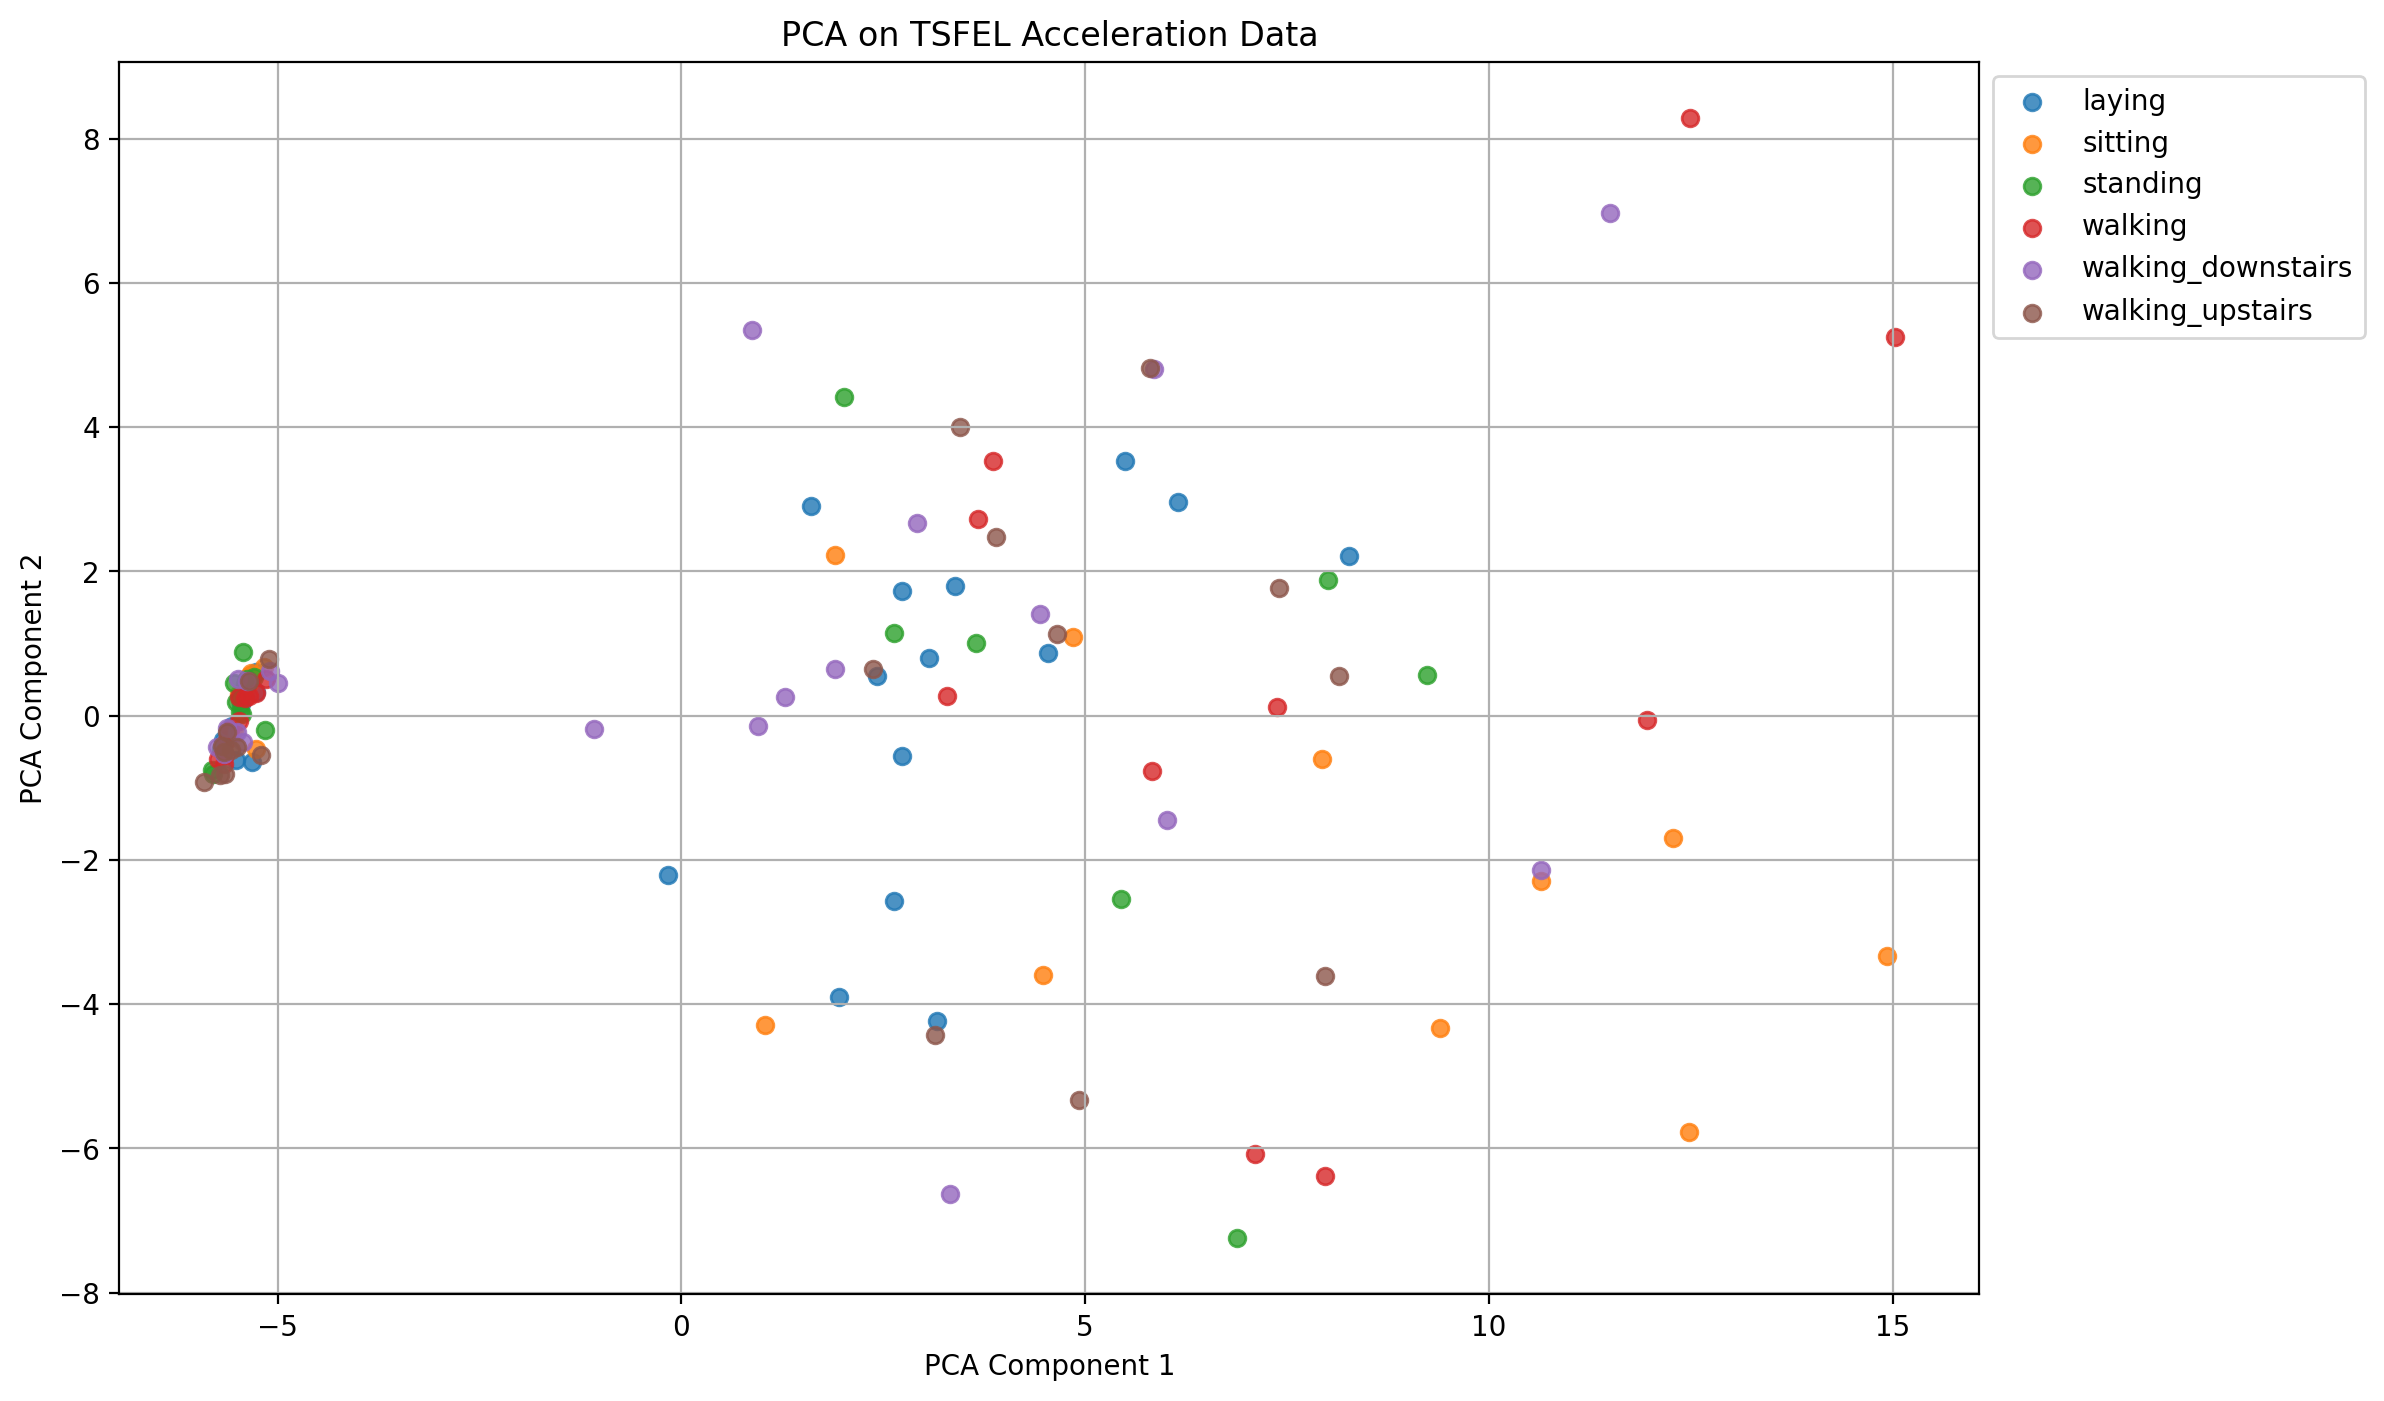

In [163]:
labels = df.iloc[:, -1]  
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_tsfel_all.iloc[:,340:])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

PCA1 = pca_result[:, 0]
PCA2 = pca_result[:, 1]

plt.figure(figsize=(12, 8))

unique_labels = labels.unique()
colors = plt.get_cmap('tab10').colors
color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

for label in unique_labels:
    mask = labels == label
    plt.scatter(PCA1[mask], PCA2[mask], color=color_map[label], label=label, alpha=0.8)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on TSFEL Acceleration Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

the PCA above has  features from 340 to 393  and the PCA below has all the TSFEL features with just new features.(just for visulalization purpose)

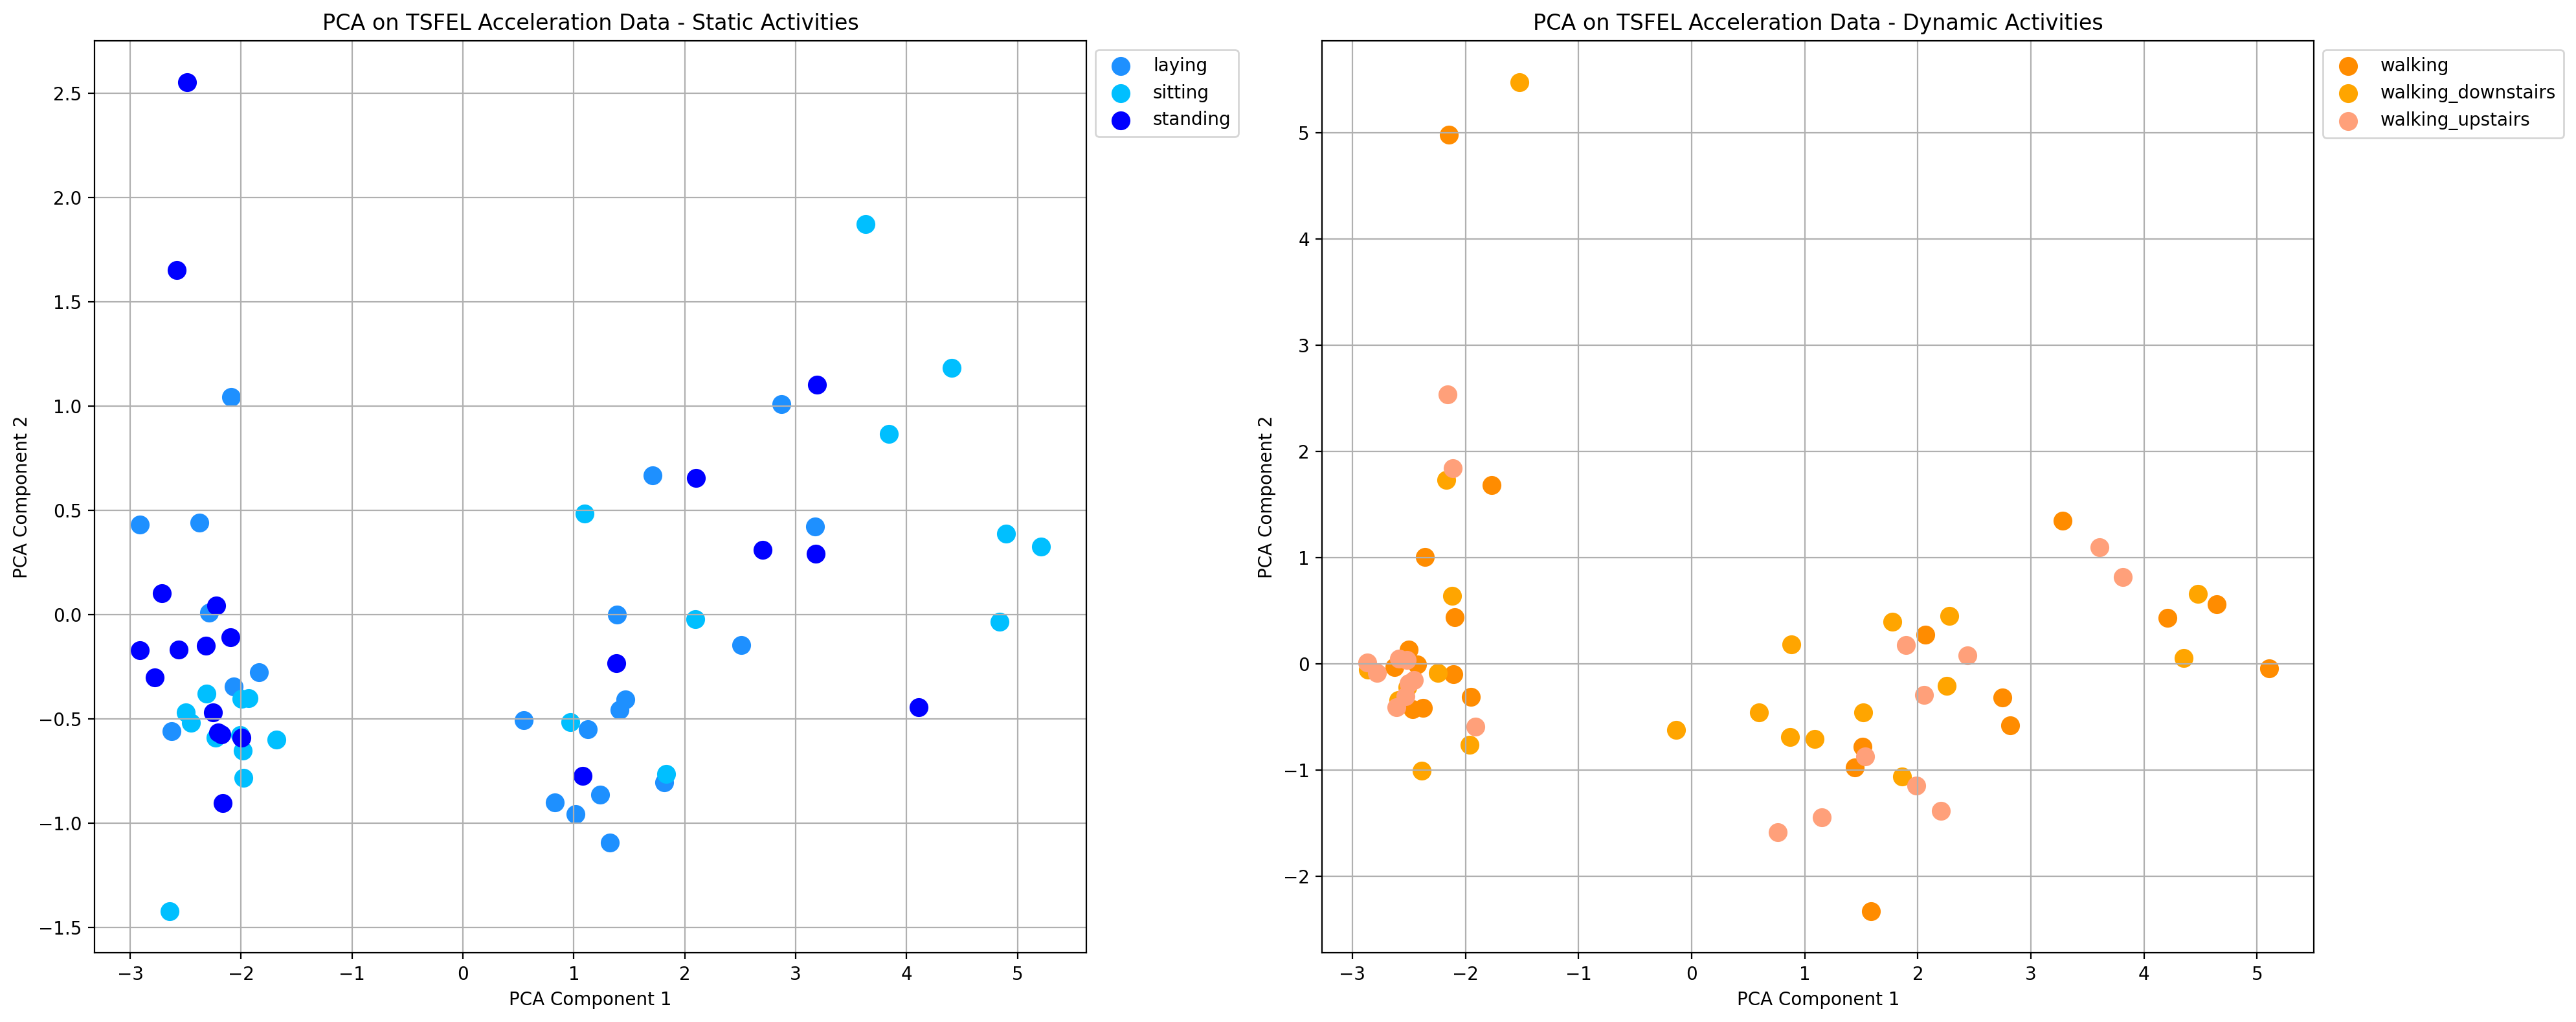

In [164]:
labels = df.iloc[:, -1]  
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_tsfel_all.iloc[:,384:])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

PCA1 = pca_result[:, 0]
PCA2 = pca_result[:, 1]

static_labels = ['laying', 'sitting', 'standing'] 
dynamic_labels = ['walking', 'walking_downstairs', 'walking_upstairs']  
static_color_map = {
    'laying': 'dodgerblue',  
    'sitting': 'deepskyblue',
    'standing': 'blue'
}

dynamic_color_map = {
    'walking': 'darkorange', 
    'walking_downstairs': 'orange',
    'walking_upstairs': 'lightsalmon'
}
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)  
for label in static_labels:
    mask = labels == label
    plt.scatter(PCA1[mask], PCA2[mask], color=static_color_map[label],label=label, s=90)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on TSFEL Acceleration Data - Static Activities')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)


plt.subplot(1, 2, 2) 
for label in dynamic_labels:
    mask = labels == label
    plt.scatter(PCA1[mask], PCA2[mask], color=dynamic_color_map[label],label=label, s=90)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on TSFEL Acceleration Data - Dynamic Activities')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

QUE-3.3

In [165]:
file_path = r'E:\kuchhbhi\UCI HAR Dataset\train\X_train.txt'
file_path_features_name = r'E:\kuchhbhi\UCI HAR Dataset\features.txt'
file_path_y =r'E:\kuchhbhi\UCI HAR Dataset\train\y_train.txt'

df_uci = pd.read_csv(file_path, sep='\s+', header=None)
feature_name_uci = pd.read_csv(file_path_features_name, sep='\s+', header=None)
y_uci = pd.read_csv(file_path_y,sep='\s+', header=None)


In [166]:
y_uci.shape

(7352, 1)

In [167]:
df_uci.shape

(7352, 561)

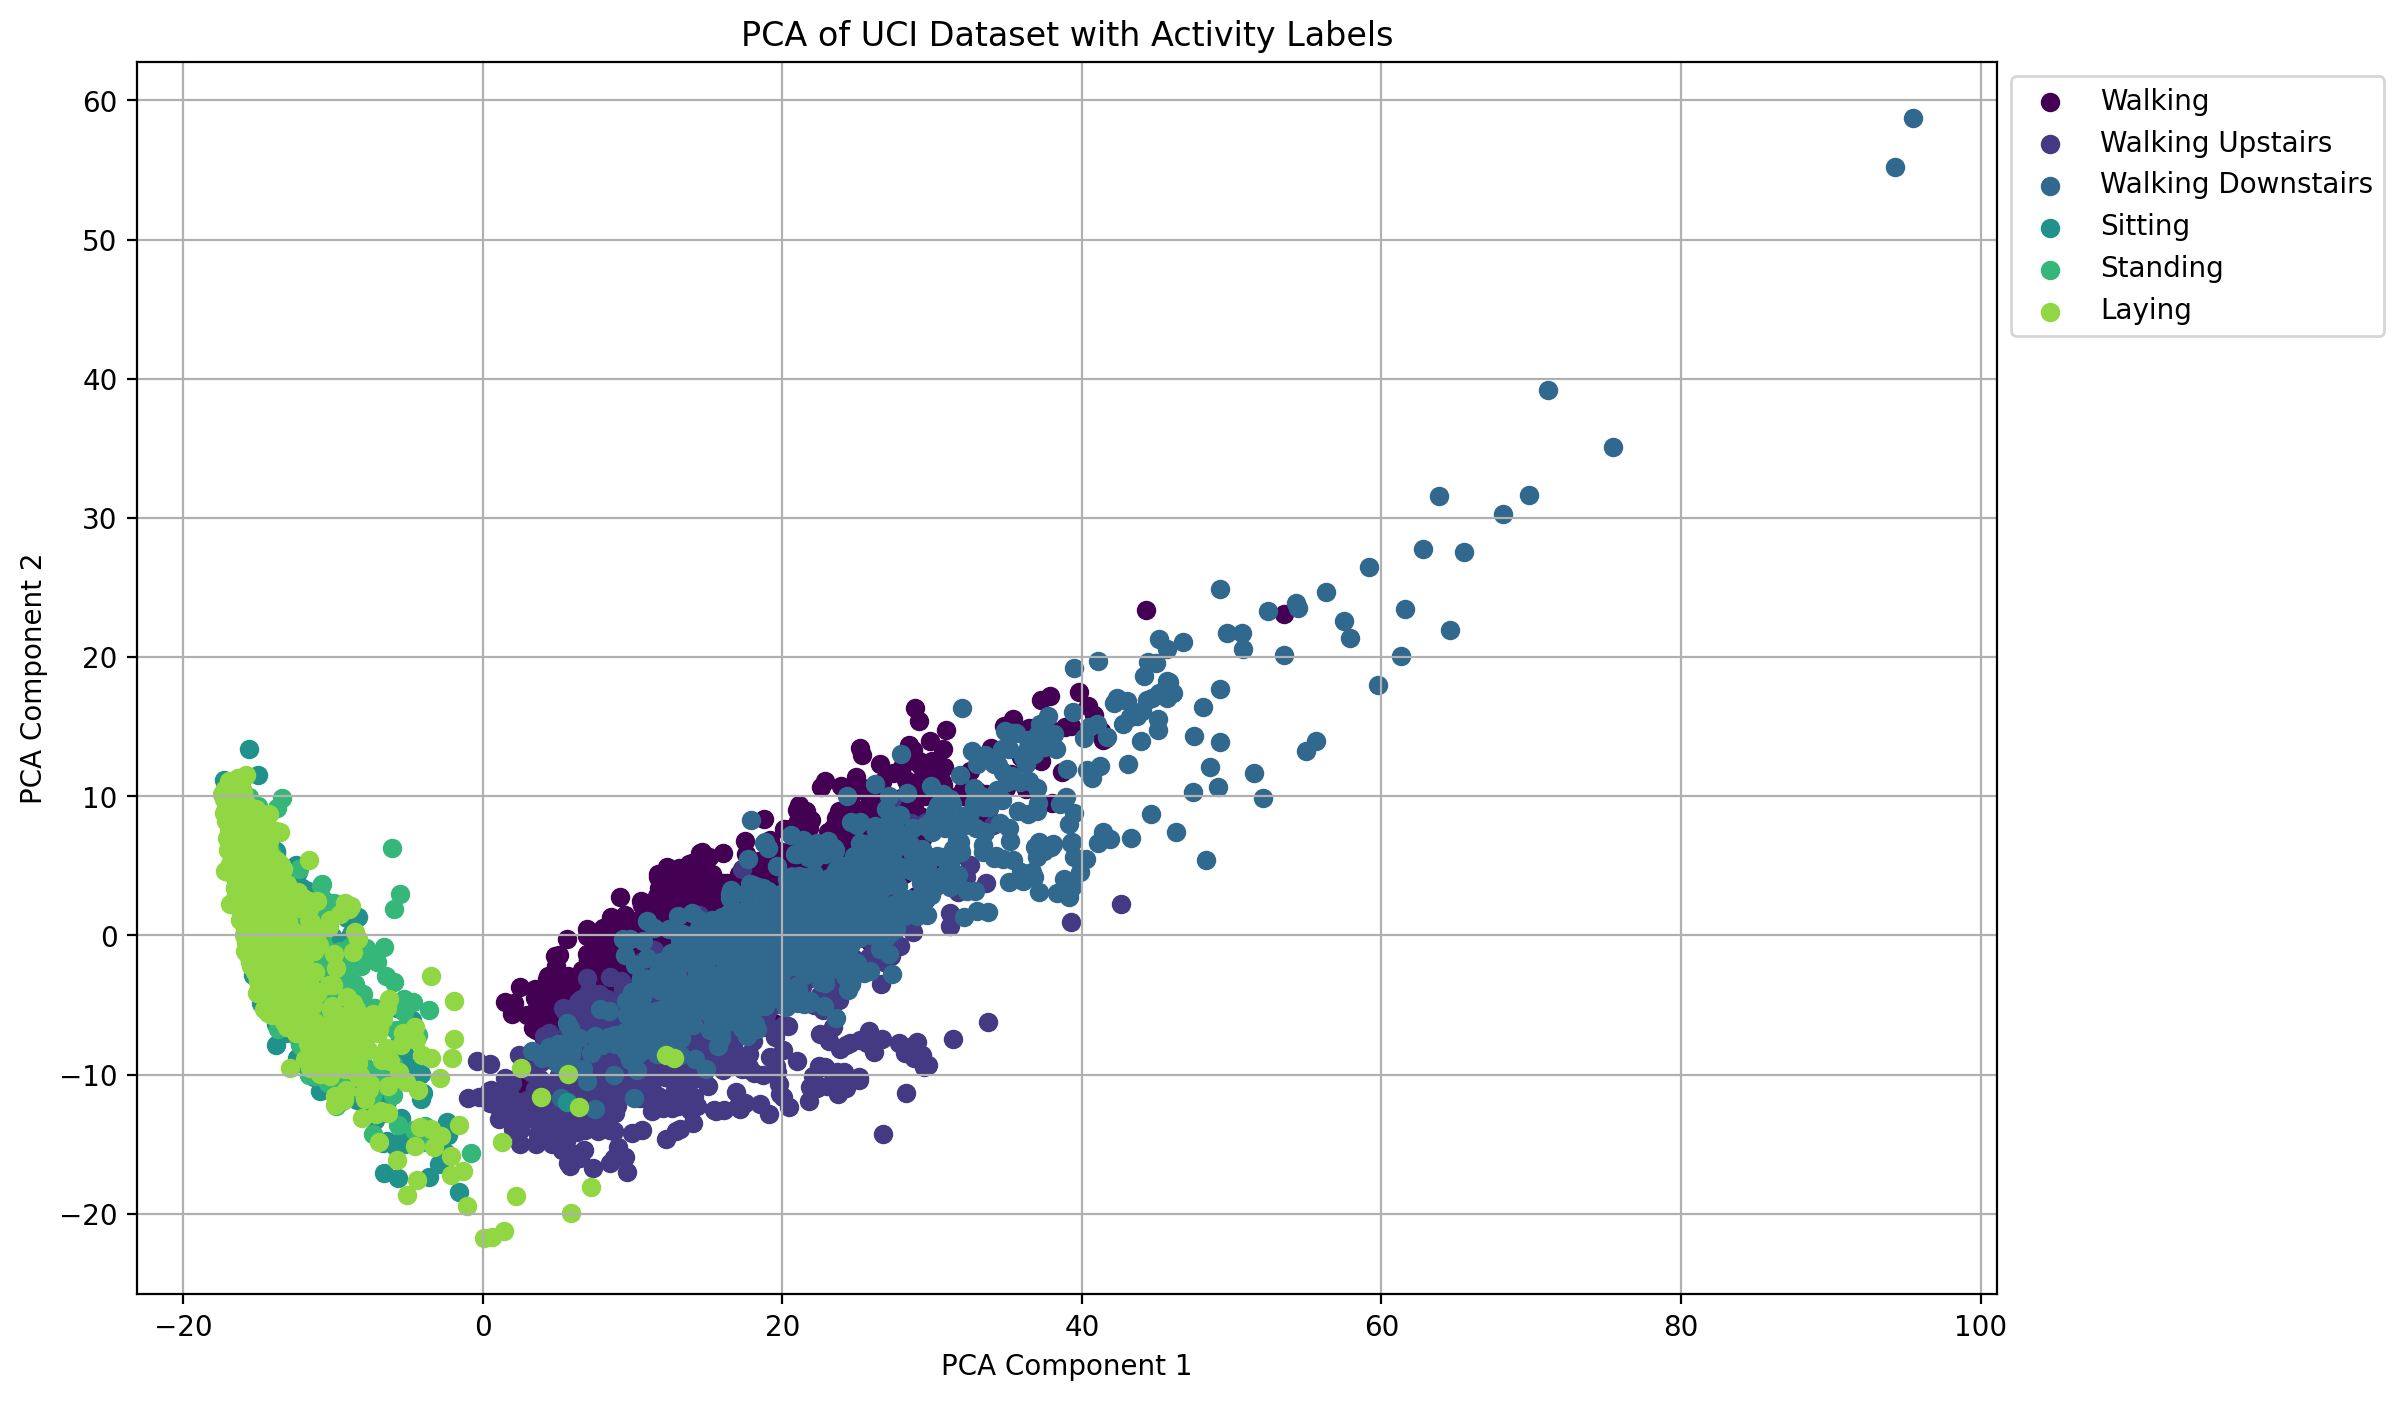

In [168]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Define activity labels
activity_labels = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

df_uci
labels = y_uci.values.flatten()  # Converting y_uci DataFrame to 1D array

scaler = StandardScaler()
df_uci_scaled = scaler.fit_transform(df_uci)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_uci_scaled)

PCA1 = pca_result[:, 0]
PCA2 = pca_result[:, 1]

plt.figure(figsize=(12, 8))

unique_labels = np.unique(labels)
colormap = plt.get_cmap('viridis')  
colors = [colormap(i / len(unique_labels)) for i in range(len(unique_labels))]

for i, label in enumerate(unique_labels):
    mask = (labels == label) 
    plt.scatter(PCA1[mask], PCA2[mask], color=colors[i], label=activity_labels[label], )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of UCI Dataset with Activity Labels')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


Que:3.4


It can be seen that the dataset with features(UCI-HAR) is more efficient in distinguishing between static and dyanamic activities. This can be seen from the plot of TSFEL PCA output and the raw data PCA output. Maybe using better features in tsfel will give better results for it but for now  its better to use the dataset with features described which is UCI-HAR. The UCI-HAR dataset has a godd amount of features(some of them are redundant but still it gives a very good classification of static and dynamic activities
)

Que: 4


CORRELATION MATRIX

In [169]:
def redundancy(c_matrix, threshold):
    redundant_f = []
    columns = c_matrix.columns
    
    for i in range(len(columns)):
        for j in range(i):
            if abs(c_matrix.iloc[i, j]) > threshold:
                redundant_f.append([columns[i], columns[j]])
    
    print("Redundant feature pairs:")
    for pair in redundant_f:
        print(pair)
    
    print(f"Number of redundant pairs: {len(redundant_f)}")


In [170]:
X_tsfel_all.iloc[:,345:].corr()
## tsfel x train data with features from 345 to the 393

,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,...,0_Zero crossing rate,Max,Min,Mean,Median,Standard Deviation,Variance,Kurtosis,Skewness,Root Mean Square
0_Variance,1.000000,0.136684,0.122050,0.121978,0.110842,0.098499,0.094424,0.101084,0.118566,0.146266,...,NaN,0.919095,-0.914132,0.607636,-0.707079,0.957774,1.000000,-0.338277,0.527768,0.926746
0_Wavelet absolute mean_0,0.136684,1.000000,0.941187,0.804708,0.640319,0.459590,0.274167,0.092559,-0.077841,-0.227133,...,NaN,0.122391,-0.133994,0.140785,0.040293,0.128351,0.136684,-0.026513,0.042292,0.153391
0_Wavelet absolute mean_1,0.122050,0.941187,1.000000,0.949785,0.834424,0.680316,0.505670,0.322816,0.141130,-0.028152,...,NaN,0.126672,-0.140049,0.167806,0.049477,0.126125,0.122050,-0.027931,0.053396,0.156681
0_Wavelet absolute mean_2,0.121978,0.804708,0.949785,1.000000,0.961393,0.861165,0.720999,0.556675,0.379779,0.202958,...,NaN,0.129919,-0.154314,0.195034,0.044094,0.129708,0.121978,-0.028916,0.060430,0.169056
0_Wavelet absolute mean_3,0.110842,0.640319,0.834424,0.961393,1.000000,0.966507,0.878248,0.750986,0.597051,0.429596,...,NaN,0.119751,-0.148196,0.220212,0.024847,0.121204,0.110842,-0.027285,0.066208,0.173240
0_Wavelet absolute mean_4,0.098499,0.459590,0.680316,0.861165,0.966507,1.000000,0.970896,0.891953,0.774353,0.630382,...,NaN,0.110329,-0.136354,0.246444,-0.002027,0.113171,0.098499,-0.026854,0.075944,0.177257
0_Wavelet absolute mean_5,0.094424,0.274167,0.505670,0.720999,0.878248,0.970896,1.000000,0.973801,0.900797,0.791020,...,NaN,0.110380,-0.130279,0.274396,-0.033111,0.114681,0.094424,-0.029483,0.091564,0.187588
0_Wavelet absolute mean_6,0.101084,0.092559,0.322816,0.556675,0.750986,0.891953,0.973801,1.000000,0.975556,0.907238,...,NaN,0.122311,-0.133951,0.305162,-0.065741,0.127974,0.101084,-0.035487,0.112860,0.206323
0_Wavelet absolute mean_7,0.118566,-0.077841,0.141130,0.379779,0.597051,0.774353,0.900797,0.975556,1.000000,0.977134,...,NaN,0.146858,-0.148671,0.339952,-0.098310,0.153162,0.118566,-0.044759,0.139662,0.234058
0_Wavelet absolute mean_8,0.146266,-0.227133,-0.028152,0.202958,0.429596,0.630382,0.791020,0.907238,0.977134,1.000000,...,NaN,0.183739,-0.174728,0.379379,-0.129513,0.189528,0.146266,-0.057075,0.171278,0.270664


In [171]:
redundancy(X_tsfel_all.iloc[:,345:].corr(),0.95)

Redundant feature pairs:
['0_Wavelet absolute mean_3', '0_Wavelet absolute mean_2']
['0_Wavelet absolute mean_4', '0_Wavelet absolute mean_3']
['0_Wavelet absolute mean_5', '0_Wavelet absolute mean_4']
['0_Wavelet absolute mean_6', '0_Wavelet absolute mean_5']
['0_Wavelet absolute mean_7', '0_Wavelet absolute mean_6']
['0_Wavelet absolute mean_8', '0_Wavelet absolute mean_7']
['0_Wavelet energy_1', '0_Wavelet energy_0']
['0_Wavelet energy_2', '0_Variance']
['0_Wavelet energy_2', '0_Wavelet energy_1']
['0_Wavelet energy_3', '0_Variance']
['0_Wavelet energy_3', '0_Wavelet energy_1']
['0_Wavelet energy_3', '0_Wavelet energy_2']
['0_Wavelet energy_4', '0_Variance']
['0_Wavelet energy_4', '0_Wavelet energy_1']
['0_Wavelet energy_4', '0_Wavelet energy_2']
['0_Wavelet energy_4', '0_Wavelet energy_3']
['0_Wavelet energy_5', '0_Variance']
['0_Wavelet energy_5', '0_Wavelet energy_2']
['0_Wavelet energy_5', '0_Wavelet energy_3']
['0_Wavelet energy_5', '0_Wavelet energy_4']
['0_Wavelet energy_6', 

In [172]:

if len(feature_name_uci) == df_uci.shape[1]:
    df_uci.columns = feature_name_uci[1]
else:
    raise ValueError("Number of feature names does not match number of columns in df_uci")

print(df_uci)


1     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

1     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322 

In [173]:
df_uci.corr()
## uci har x train dataset 

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
1,,,,,,,,,,,,,,,,,,,,,
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.037444,0.017967,-0.063609,0.018985,-0.008507,-0.018429,0.019389,-0.012546,-0.023525,0.025066,...,-0.026615,0.034514,0.024553,-0.006269,0.009141,1.000000,-0.116001,-0.005853,-0.012313,-0.019903
"angle(tBodyGyroJerkMean,gravityMean)",0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,0.000102,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,0.087332,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655


In [174]:
redundancy(df_uci.corr(), 0.95)

    

Redundant feature pairs:
['tBodyAcc-mad()-X', 'tBodyAcc-std()-X']
['tBodyAcc-mad()-Y', 'tBodyAcc-std()-Y']
['tBodyAcc-mad()-Z', 'tBodyAcc-std()-Z']
['tBodyAcc-max()-X', 'tBodyAcc-std()-X']
['tBodyAcc-max()-X', 'tBodyAcc-mad()-X']
['tBodyAcc-max()-Y', 'tBodyAcc-std()-Y']
['tBodyAcc-min()-X', 'tBodyAcc-std()-X']
['tBodyAcc-min()-X', 'tBodyAcc-mad()-X']
['tBodyAcc-min()-Y', 'tBodyAcc-std()-Y']
['tBodyAcc-sma()', 'tBodyAcc-std()-X']
['tBodyAcc-sma()', 'tBodyAcc-std()-Y']
['tBodyAcc-sma()', 'tBodyAcc-mad()-X']
['tBodyAcc-sma()', 'tBodyAcc-mad()-Y']
['tBodyAcc-sma()', 'tBodyAcc-max()-X']
['tBodyAcc-sma()', 'tBodyAcc-min()-X']
['tBodyAcc-energy()-X', 'tBodyAcc-mad()-X']
['tBodyAcc-iqr()-X', 'tBodyAcc-std()-X']
['tBodyAcc-iqr()-X', 'tBodyAcc-mad()-X']
['tBodyAcc-iqr()-X', 'tBodyAcc-sma()']
['tBodyAcc-iqr()-Y', 'tBodyAcc-std()-Y']
['tBodyAcc-iqr()-Y', 'tBodyAcc-mad()-Y']
['tBodyAcc-iqr()-Z', 'tBodyAcc-std()-Z']
['tBodyAcc-iqr()-Z', 'tBodyAcc-mad()-Z']
['tGravityAcc-mad()-X', 'tGravityAcc-std()-

The features which are called redundant here are highly correlated since the threshold is set to 0.95. Hence they are both highly correlated and since they give similar correlation values they are redundant too.